1. Undestanding the problem
2. EDA
3. Data Preprocessing
4. Feature Selection  
5. Modeling 
6. Evaluation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# DATA SOURCING

In [2]:
#Data sourcing
data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

In [5]:
#EDA on train data
print(data_train.columns)
print(data_train.info())
print(data_train.shape)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
(891, 12)


In [6]:
#EDA on test data
print(data_test.columns)
print(data_test.info())
print(data_test.shape)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
(418, 11)


In [7]:
#checking any null value
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#We can drop the cabin column as percentage of empty value in more in pre processing

In [9]:
#checking any null value
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#We can drop the cabin column as percentage of empty value in more in pre processing

In [11]:
#checking duplicate value
data_train.duplicated().sum()

0

In [12]:
#checking duplicate value
data_test.duplicated().sum()

0

In [13]:
#No duplicated values in train or test data


In [14]:
#statical analysis
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [15]:
#statical analysis
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [16]:
No_of_col=len(data_train.columns)

In [17]:
#segreagte numerical or categorial
numeric_data_train = data_train.select_dtypes(exclude=['object'])
categorical_data_train = data_train.select_dtypes(include=['object'])
print(numeric_data_train)

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


In [18]:
#segreagte numerical or categorial
numeric_data_test = data_test.select_dtypes(exclude=['object'])
categorical_data_test = data_test.select_dtypes(include=['object'])

In [19]:
#finding important features
correlation_train=data_train.corr()
correlation_test=data_test.corr()

In [20]:
correlation_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [21]:
columns_list=numeric_data_train.columns

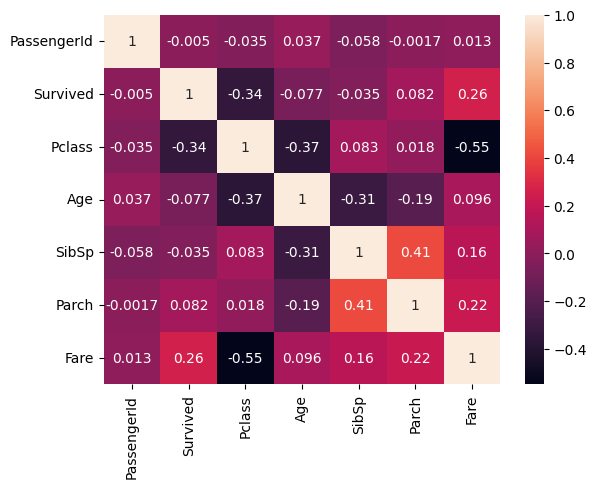

In [22]:
sns.heatmap(correlation_train, annot=True)
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

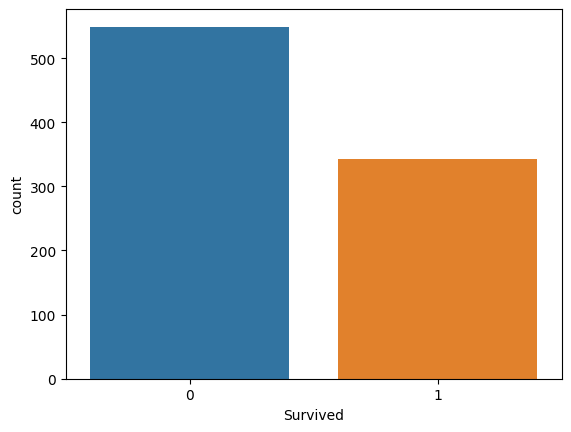

In [23]:
#Visualizing The Data Set
sns.countplot(x='Survived',data=data_train)

In [24]:
#we can see that the percentage of not survived people is more than the people who survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

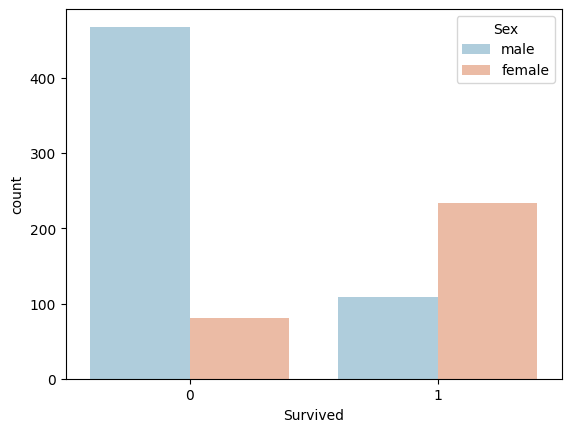

In [25]:
#Survived vs Sex
#Let us see how survival is dependent upon the sex

sns.countplot(x='Survived',data=data_train,hue='Sex',palette='RdBu_r')

In [26]:
#It looks like people that did not survive were much more likely to be men. While those who survived were twice as likely to be female.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

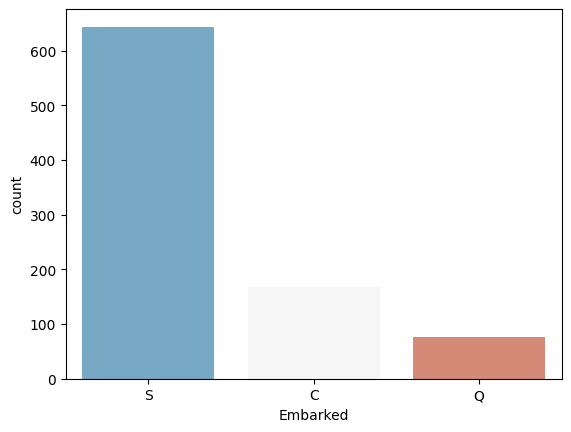

In [27]:
#countplot of embarked
sns.countplot(x='Embarked',data=data_train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

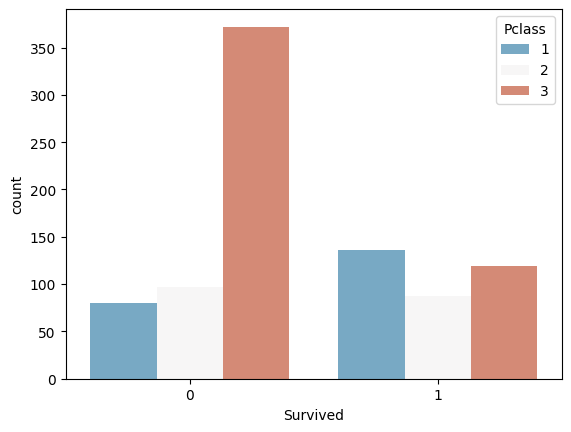

In [28]:
#Survived vs Pclass
sns.countplot(x='Survived',data=data_train,hue='Pclass',palette='RdBu_r')

In [29]:
#lso it looks like the people who did not survive were overwhelmingly part of 3rd class. People that did survive were from the higher classes.|

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

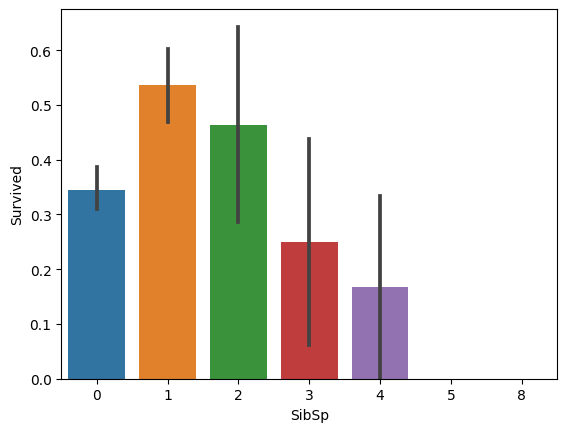

In [30]:
#Survived vs sibsip
sns.barplot(x='SibSp',y='Survived',data=data_train)
#It seems that having 1 Sibsp has the highest probability of surviving

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

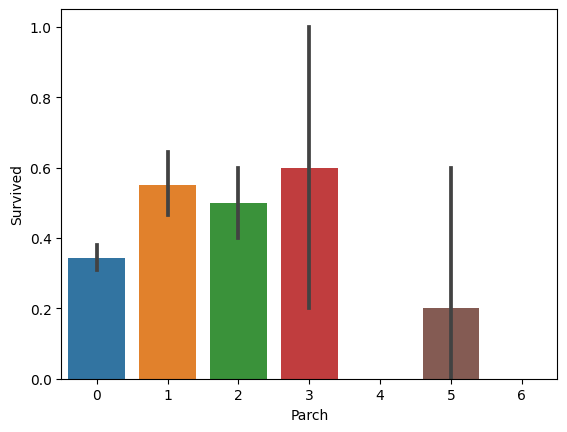

In [31]:
#Survived vs parch
sns.barplot(x='Parch',y='Survived',data=data_train)
#Having 3 parents/children Aboard has highest chance of survival

<AxesSubplot:xlabel='Age', ylabel='Count'>

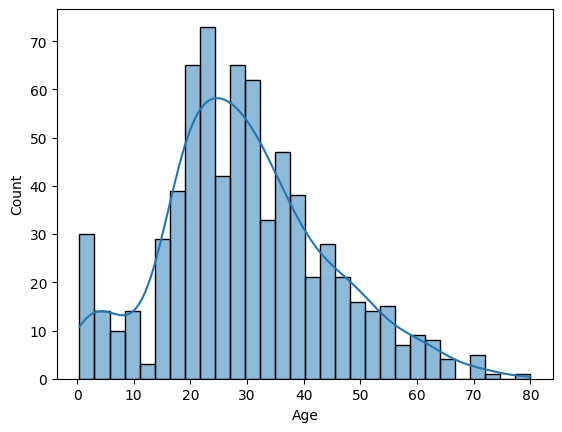

In [32]:
#distributon from histogram of age 
sns.histplot(data_train['Age'].dropna(),bins=30,kde=True)
#We see it is almost normally distributed
#right skewed
#avg age 20-30 

<AxesSubplot:xlabel='Fare', ylabel='Count'>

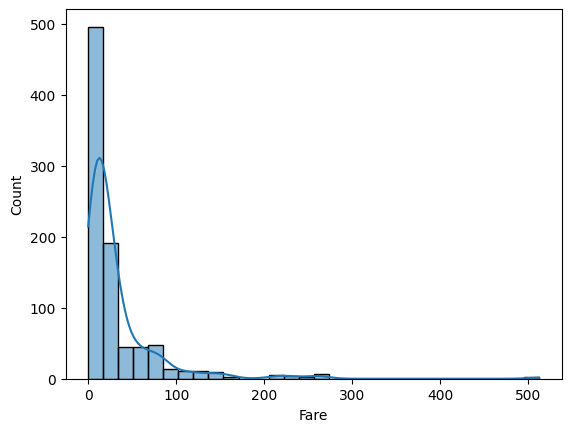

In [33]:
#distributon from histogram of Fare 
sns.histplot(data_train['Fare'].dropna(),bins=30,kde=True)
#We see it is almost normally distributed
#right skewed


In [34]:
#we will plot box plot for Fare and age to check for outliers for train data

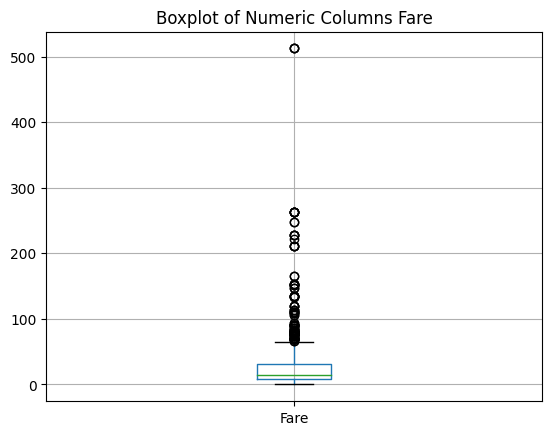

In [35]:
#Boxplot of Fare column
data_train.boxplot(column=["Fare"])
plt.title('Boxplot of Numeric Columns '+"Fare")
plt.show()

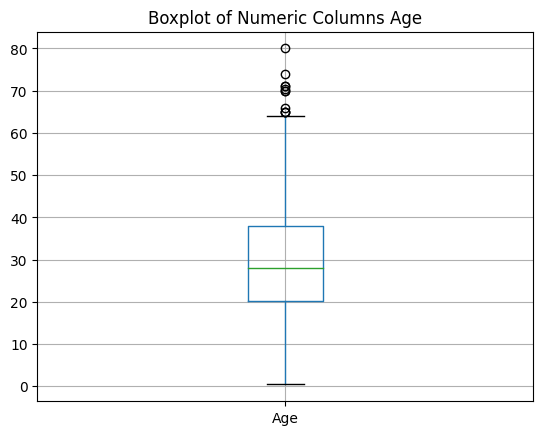

In [36]:
#Boxplot of Fare column
data_train.boxplot(column=["Age"])
plt.title('Boxplot of Numeric Columns '+"Age")
plt.show()

# EDA analysis 
1. Survived is output column and its dependent
2. 11 indepedent variable we have
3.  7 numerical and 5 categorial
4. We can drop cabin column as it has may missing values 
5. Parc and sibsp has correlation 0.41
6 . Count plot
    a. we can see that the percentage of not survived people is more than the people who survived.
    b. It looks like people that did not survive were much more likely to be men. While those who survived were twice as likely      to be female.    
    c.also it looks like the people who did not survive were overwhelmingly part of 3rd class. People that did survive were from      the higher classes.
7. Barplot
    a. It seems that having 1 Sibsp has the highest probability of surviving
    b. Having 3 parents/children Aboard has highest chance of survival
8.  Age distribution
    We see it is almost normally distributed
    right skewed
    avg age 20-30 
9. Fare
    We see it is almost normally distributed
    right skewed
    30 aorung avg
10. box plot for outlier in Age and Fare
11. missing value in age and embarked in test data (also is cabin but we will dropped it as its percentage is more)
12. missing value in age and embarked in test data (also is cabin but we will dropped it as its percentage is more)


# Preprocessing

In [37]:
a=data_train["Age"].median()
print(a)

28.0


In [38]:
#missing value handle in train data and test
#It has outliers i will fill it with median
data_train["Age"]=data_train["Age"].fillna(data_train["Age"].median())
data_test["Age"]=data_test["Age"].fillna(data_test["Age"].median())

In [39]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Log transformation to make Right Skewed to Normal distribution

In [40]:
#making right skewed fare normally distrubuted
data_train['Fare_log']=np.log2(data_train['Fare'])


C:\Users\mussingh\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [41]:
#making right skewed fare normally distrubuted
data_test['Fare_log']=np.log2(data_test['Fare'])


<AxesSubplot:xlabel='Fare_log', ylabel='Count'>

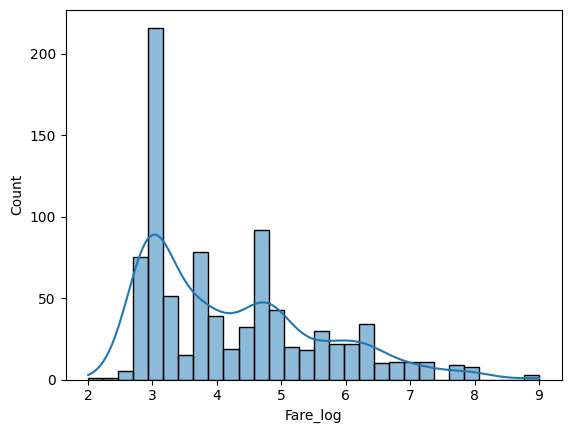

In [42]:
#distributon from histogram of Fare 
sns.histplot(data_train['Fare_log'].dropna(),bins=30,kde=True)
#We see it is almost normally distributed
#right skewed


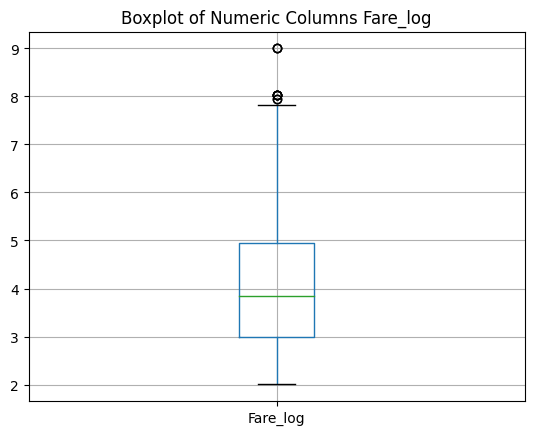

In [43]:
#Boxplot of Fare column
data_train.boxplot(column=["Fare_log"])
plt.title('Boxplot of Numeric Columns '+"Fare_log")
plt.show()

In [44]:
#dropping cabin column as it has too many missing values
data_train=data_train.drop(['Cabin'],axis=1)
data_test=data_test.drop(['Cabin'],axis=1)

In [45]:
#filling missing value for Embarked in data_train
data_train.fillna(data_train["Embarked"].mode(),inplace=True)


In [46]:
data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Fare_log       0
dtype: int64

In [47]:
data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Fare_log       1
dtype: int64

# Handling Outliers

In [48]:
#Handling outliers
data_train['Age'].dtypes
# data_train['Age'] = data_train['Age'].astype('float')
# count = len(data_train[data_train['Age'] > 62])


dtype('float64')

In [49]:
count = len(data_train[data_train['Age'] > 62])

In [50]:
count

15

In [51]:
for index in data_train.index:
        if data_train.loc[index,'Age']>62:            
            data_train.loc[index,'Age']=62
            
for index in data_test.index:
        if data_test.loc[index,'Age']>62:            
            data_test.loc[index,'Age']=62
   
        
   
        

In [52]:
count = len(data_test[data_test['Fare_log'] > 7.8])

In [53]:
count

10

In [54]:
for index in data_train.index:
        if data_train.loc[index,'Fare_log']>7.8:            
            data_train.loc[index,'Fare_log']=7.8
for index in data_test.index:
        if data_test.loc[index,'Fare_log']>7.8:            
            data_test.loc[index,'Fare_log']=7.8
for index in data_test.index:
        if data_test.loc[index,'Fare_log']<2:            
            data_test.loc[index,'Fare_log']=2
for index in data_train.index:
        if data_train.loc[index,'Fare_log']<2:            
            data_train.loc[index,'Fare_log']=2
   
        
        

In [55]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Fare_log     891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


In [56]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.857981
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,6.155492
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.986411
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,5.730640
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,3.008989
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,3.080368
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,5.696620
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4.397461
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,3.476809
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,4.910291


In [57]:
#Dropping Passengers id and name column as it will not help in Model
data_train.drop(["PassengerId"],axis=1,inplace=True)
data_train.drop(["Name"],axis=1,inplace=True)

In [58]:
#Dropping Passengers id and name column as it will not help in Model from test data
data_test.drop(["PassengerId"],axis=1,inplace=True)
data_test.drop(["Name"],axis=1,inplace=True)

In [59]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log
0,3,male,34.5,0,0,330911,7.8292,Q,2.968865
1,3,female,47.0,1,0,363272,7.0000,S,2.807355
2,2,male,62.0,0,0,240276,9.6875,Q,3.276124
3,3,male,27.0,0,0,315154,8.6625,S,3.114783
4,3,female,22.0,1,1,3101298,12.2875,S,3.619120


In [60]:
data_test.drop(["Ticket"],axis=1,inplace=True)
data_train.drop(["Ticket"],axis=1,inplace=True)

In [61]:
#We will encoding for Sex and Embarked Column
#Binary encoding for Sex
sex_map = {'male': 0, 'female': 1}
data_train['Sex'] = data_train['Sex'].map(sex_map)
data_train['Sex'] = data_train['Sex'].apply(lambda x: format(x, 'b'))

data_test['Sex'] = data_test['Sex'].map(sex_map)
data_test['Sex'] = data_test['Sex'].apply(lambda x: format(x, 'b'))

In [62]:
from sklearn.preprocessing import LabelEncoder



# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical data
data_train['Embarked'] = le.fit_transform(data_train['Embarked'])

In [63]:
data_test['Embarked'] = le.fit_transform(data_test['Embarked'])

# Modelling

In [64]:
X_data

NameError: name 'X_data' is not defined

In [65]:
X_data=data_train.drop(['Fare'],axis=1)

In [66]:
Y_data=data_train['Survived']

In [67]:
Y_data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [68]:
X_data=data_train.drop(['Survived'],axis=1)
X_data=X_data.drop(['Fare'],axis=1)




In [69]:
X_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,3,0,22.0,1,0,2,2.857981
1,1,1,38.0,1,0,0,6.155492
2,3,1,26.0,0,0,2,2.986411
3,1,1,35.0,1,0,2,5.730640
4,3,0,35.0,0,0,2,3.008989
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,2,3.700440
887,1,1,19.0,0,0,2,4.906891
888,3,1,28.0,1,2,2,4.551516
889,1,0,26.0,0,0,0,4.906891


In [70]:
# Dividing into training data and  test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

In [71]:
infinite_mask = X_train.isin([np.inf, -np.inf]).sum()

In [72]:
infinite_mask.isnull().sum()

0

In [73]:
infinite_mask

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Fare_log    0
dtype: int64

In [74]:
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
y_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test.replace([np.inf, -np.inf], np.nan, inplace=True)



In [75]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Fare_log    0
dtype: int64

In [76]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
331,1,0,45.5,0,0,2,4.832890
733,2,0,23.0,0,0,2,3.700440
382,3,0,32.0,0,0,2,2.986411
704,3,0,26.0,1,0,2,2.973464
813,3,1,6.0,4,2,2,4.966938
...,...,...,...,...,...,...,...
106,3,1,21.0,0,0,2,2.935460
270,1,0,28.0,0,0,2,4.954196
860,3,0,41.0,2,0,2,3.818472
435,1,1,14.0,1,2,2,6.906891


In [77]:
##standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data using StandardScaler
scaled_data_X_train = scaler.fit_transform(X_train)
scaled_data_X_test = scaler.transform(X_test)


In [78]:
scaled_data_X_train

array([[-1.61413602, -0.7243102 ,  1.28529285, ..., -0.47934164,
         0.55744438,  0.46960031],
       [-0.40055118, -0.7243102 , -0.48012848, ..., -0.47934164,
         0.55744438, -0.3634777 ],
       [ 0.81303367, -0.7243102 ,  0.22604005, ..., -0.47934164,
         0.55744438, -0.88874727],
       ...,
       [ 0.81303367, -0.7243102 ,  0.93220858, ..., -0.47934164,
         0.55744438, -0.27664801],
       [-1.61413602,  1.38062393, -1.18629702, ...,  2.04874166,
         0.55744438,  1.99532227],
       [-1.61413602, -0.7243102 , -0.63705482, ...,  0.78470001,
         0.55744438,  1.52839013]])

In [79]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [80]:
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [81]:
logisticRegr.fit(scaled_data_X_train,y_train)

LogisticRegression()

In [82]:
###reg_prediction
logreg_predict=logisticRegr.predict(scaled_data_X_test)


In [83]:
logreg_predict

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, logreg_predict)

0.7988826815642458

In [85]:
from sklearn.metrics import precision_score
precision_score(y_test, logreg_predict)
    

0.7714285714285715

In [86]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, logreg_predict)
print(confusion_matrix)

[[89 16]
 [20 54]]


In [87]:
#Recall is also 1
Recall=89/(89+20)

In [88]:
### predicting for the Test data given in problem
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_log
0,3,0,34.5,0,0,7.8292,1,2.968865
1,3,1,47.0,1,0,7.0000,2,2.807355
2,2,0,62.0,0,0,9.6875,1,3.276124
3,3,0,27.0,0,0,8.6625,2,3.114783
4,3,1,22.0,1,1,12.2875,2,3.619120
...,...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,8.0500,2,3.008989
414,1,1,39.0,0,0,108.9000,0,6.766860
415,3,0,38.5,0,0,7.2500,2,2.857981
416,3,0,27.0,0,0,8.0500,2,3.008989


In [89]:
data_test=data_test.drop(['Fare'],axis=1)

In [90]:
data_test.replace([np.inf, -np.inf], np.nan, inplace=True)
# Calculate the mean of the "Fare_log" column
fare_log_mean = data_test['Fare_log'].mean()

# Replace NaN values in "Fare_log" column with the calculated mean
data_test['Fare_log'].fillna(fare_log_mean, inplace=True)

In [91]:
data_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Fare_log    0
dtype: int64

In [92]:
scaled_data_test = scaler.transform(data_test)
logreg_predict_for_test=logisticRegr.predict(scaled_data_test)

In [93]:
len(logreg_predict_for_test)

418

In [94]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare_log
0,3,0,34.5,0,0,1,2.968865
1,3,1,47.0,1,0,2,2.807355
2,2,0,62.0,0,0,1,3.276124
3,3,0,27.0,0,0,2,3.114783
4,3,1,22.0,1,1,2,3.619120
...,...,...,...,...,...,...,...
413,3,0,27.0,0,0,2,3.008989
414,1,1,39.0,0,0,0,6.766860
415,3,0,38.5,0,0,2,2.857981
416,3,0,27.0,0,0,2,3.008989


# Support vector classifier

In [95]:
from sklearn.svm import SVC

In [96]:
svc_mod=SVC()

In [97]:
svc_mod

SVC()

In [98]:
svc_mod.fit(scaled_data_X_train,y_train)

SVC()

In [99]:
svc_predict=svc_mod.predict(scaled_data_X_test)


In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, logreg_predict)

0.7988826815642458

In [101]:
from sklearn.metrics import precision_score
precision_score(y_test, logreg_predict)
    

0.7714285714285715

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, logreg_predict)
print(confusion_matrix)

[[89 16]
 [20 54]]


Decision Tree classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

# create a regressor object
dt_class= DecisionTreeClassifier()

# fit the regressor with X and Y data
dt_class.fit(scaled_data_X_train,y_train)
dt_predict_class=dt_class.predict(scaled_data_X_test)


In [104]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_predict_class)

0.7821229050279329

In [105]:
from sklearn.metrics import precision_score
precision_score(y_test, dt_predict_class)
    

0.7464788732394366

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, dt_predict_class)
print(confusion_matrix)

[[87 18]
 [21 53]]


Random Forest classifier

In [107]:

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
randomFor= RandomForestClassifier()

In [108]:
randomFor.fit(scaled_data_X_train,y_train)

RandomForestClassifier()

In [109]:
randomFor_pred=randomFor.predict(scaled_data_X_test)

In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, randomFor_pred)

0.8212290502793296

In [111]:
from sklearn.metrics import precision_score
precision_score(y_test, randomFor_pred)
    

0.7916666666666666

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, randomFor_pred)
print(confusion_matrix)

[[90 15]
 [17 57]]


ADABOOST

In [113]:
from sklearn.ensemble import AdaBoostClassifier
ADA_CLASS= AdaBoostClassifier()
ADA_CLASS.fit(scaled_data_X_train,y_train)
ADA_predict=ADA_CLASS.predict(scaled_data_X_test)

In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, ADA_predict)

0.7877094972067039

In [115]:
from sklearn.metrics import precision_score
precision_score(y_test, ADA_predict)
    

0.75

GRADIENT BOOST

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
Gradient_class= GradientBoostingClassifier()
Gradient_class.fit(scaled_data_X_train,y_train)
Gradient_predict= Gradient_class.predict(scaled_data_X_test)

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Gradient_predict)

0.8212290502793296

In [120]:
import xgboost
xgb=xgboost.XGBClassifier()
xgb.fit(scaled_data_X_train,y_train)
xgb_predict= xgb.predict(scaled_data_X_test)

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, xgb_predict)

0.8100558659217877